In this project we will try to use genetic algorithms to find a solution to Battleship game (sinking all those placed on the board).

In [1]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from statistics import mean 
from aco import AntColony

Initialize the variables needed for the function.

In [2]:
board_size = 10
target_board = np.zeros((board_size, board_size))
board = np.zeros((board_size, board_size))
maxResult = 10
resultsList = []
timeList = []
bestResultsTimeList = []
perfectResultsTimeList = []

We will need a simple fitness function that will compare the board with the adopted solution parameter. Based on this data, we will find out how many ships the algorithm managed to sink.

In [3]:
def fitness_func(solution, solution_idx):
    board = np.zeros((len(target_board), len(target_board)))

    for i in range(0, len(solution), 2):
        row = solution[i]
        col = solution[i+1]
        board[row][col] = 1

    hits = 0
    for i in range(len(target_board)):
        for j in range(len(target_board)):
            if board[i][j] == 1 and target_board[i][j] == 1:
                hits += 1
    return hits

The showResults() function will be used to visualize the obtained result. Ships on the board will be colored yellow. Those that are hit will remain yellow, and the missed spots will be highlighted in blue.

In [4]:
def showResults(solution):
    result = np.copy(target_board)
    board = np.zeros((len(target_board), len(target_board)))
    for i in range(0, len(solution), 2):
        row = solution[i]
        col = solution[i+1]
        board[row][col] = 1

    for i in range(len(result)):
        for j in range(len(result[0])):
            if target_board[i][j] == board[i][j]:
                result[i][j] += board[i][j]
    plt.matshow(result)
    plt.show()
    

To better understand the effectiveness of the written algorithms, we will use interpretResults().

In [9]:
def interprateResults(_maxResult, _resultsList, _bestResultsTimeList, _perfectResultsTimeList):
    print("Average hits of all solutions = ", mean([x / _maxResult for x in _resultsList]))                                
    print("Number of solutions better than or equal to 90% effectiveness = ", len(_bestResultsTimeList))
    if len(_bestResultsTimeList) > 0:
        print("Average time of solutions better than or equal to 90% effectiveness = ", mean(_bestResultsTimeList))
    print("Number of perfect solutions = ", len(_perfectResultsTimeList))
    if len(_perfectResultsTimeList) > 0:
        print("Average time of perfect solutions = ", mean(_perfectResultsTimeList))

Let's start with 5x5 boards. We will create three example ship setups: 1x triple, 2x double, 3x single. Let's visualize it right away.

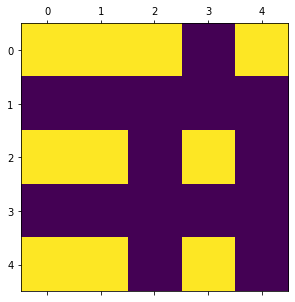

In [6]:
target_board = np.array([[1,1,1,0,1],
                         [0,0,0,0,0],
                         [1,1,0,1,0],
                         [0,0,0,0,0],
                         [1,1,0,1,0]])
plt.matshow(target_board)
plt.show()

Let's see an example of what a wrong place on the ship will look like. Let's set a random, bad number for generations, parents, population and mutations.

Number of hits = 7 / 10
Number of shots fired = 26


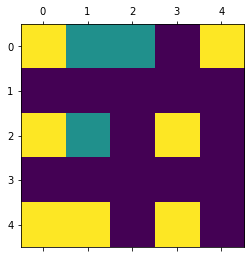

In [10]:
ga_instance = pygad.GA(num_generations=3,
                       num_parents_mating=4,
                       fitness_func=fitness_func,
                       sol_per_pop=10,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=5)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Number of shots fired =", len(solution))
showResults(solution)

Now let's change the value of generations to 100, although a much smaller number will also suffice.

The chromosomes will be the lengths of all available squares on the board +1 for the fitness function we wrote for even numbers only. So the length will be 26.

We will set the population to 100.

Let's take the smallest mutation that pygad allows us = 4.

In [11]:
maxResult5x5_1 = 10
resultsList5x5_1 = []
timeList5x5_1 = []
bestResultsTimeList5x5_1 = []
perfectResultsTimeList5x5_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_1.append(solution_fitness)
    timeList5x5_1.append(end - start)

for i in range(100):
    if resultsList5x5_1[i] == maxResult5x5_1:
        perfectResultsTimeList5x5_1.append(timeList5x5_1[i])
    if resultsList5x5_1[i]/maxResult5x5_1 >= 0.9:
        bestResultsTimeList5x5_1.append(timeList5x5_1[i])
        
interprateResults(maxResult5x5_1, resultsList5x5_1, bestResultsTimeList5x5_1, perfectResultsTimeList5x5_1)

Average hits of all solutions =  1.0
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  0.30054645776748656
Number of perfect solutions =  100
Average time of perfect solutions =  0.30054645776748656


As we can see, the effectiveness is very high.

Let's move on to the next example.

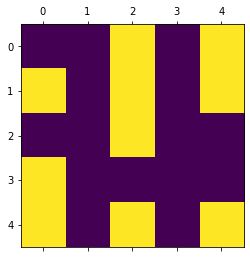

In [12]:
target_board = np.array([[0,0,1,0,1],
                         [1,0,1,0,1],
                         [0,0,1,0,0],
                         [1,0,0,0,0],
                         [1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Number of hits = 10 / 10
Number of shots fired = 26


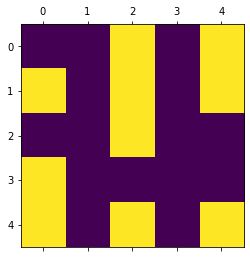

In [13]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Number of shots fired =", len(solution))
showResults(solution)

In [14]:
maxResult5x5_2 = 10
resultsList5x5_2 = []
timeList5x5_2 = []
bestResultsTimeList5x5_2 = []
perfectResultsTimeList5x5_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_2.append(solution_fitness)
    timeList5x5_2.append(end - start)

for i in range(100):
    if resultsList5x5_2[i] == maxResult5x5_2:
        perfectResultsTimeList5x5_2.append(timeList5x5_2[i])
    if resultsList5x5_2[i]/maxResult5x5_2 >= 0.9:
        bestResultsTimeList5x5_2.append(timeList5x5_2[i])
        
interprateResults(maxResult5x5_2, resultsList5x5_2, bestResultsTimeList5x5_2, perfectResultsTimeList5x5_2)

Average hits of all solutions =  0.996
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  0.31193971157073974
Number of perfect solutions =  96
Average time of perfect solutions =  0.31165114790201187


Here, our effectiveness was close to the previous one.

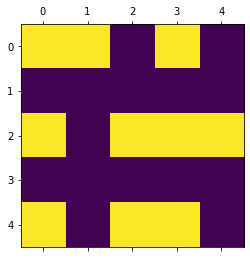

In [15]:
target_board = np.array([[1,1,0,1,0],
                         [0,0,0,0,0],
                         [1,0,1,1,1],
                         [0,0,0,0,0],
                         [1,0,1,1,0]])
plt.matshow(target_board)
plt.show()

Number of hits = 10 / 10
Number of shots fired = 26


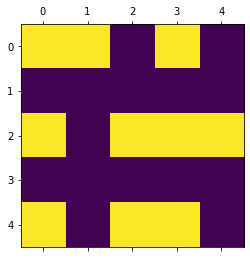

In [16]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Number of shots fired =", len(solution))
showResults(solution)

In [17]:
maxResult5x5_3 = 10
resultsList5x5_3 = []
timeList5x5_3 = []
bestResultsTimeList5x5_3 = []
perfectResultsTimeList5x5_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_3.append(solution_fitness)
    timeList5x5_3.append(end - start)

for i in range(100):
    if resultsList5x5_3[i] == maxResult5x5_3:
        perfectResultsTimeList5x5_3.append(timeList5x5_3[i])
    if resultsList5x5_3[i]/maxResult5x5_3 >= 0.9:
        bestResultsTimeList5x5_3.append(timeList5x5_3[i])
        
interprateResults(maxResult5x5_3, resultsList5x5_3, bestResultsTimeList5x5_3, perfectResultsTimeList5x5_3)

Average hits of all solutions =  1.0
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  0.31220049858093263
Number of perfect solutions =  100
Average time of perfect solutions =  0.31220049858093263


We obtained a similar result.

Let's see one more example for a test.

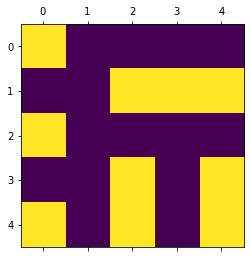

In [18]:
target_board = np.array([[1,0,0,0,0],
                         [0,0,1,1,1],
                         [1,0,0,0,0],
                         [0,0,1,0,1],
                         [1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Number of hits = 10 / 10
Number of shots fired = 26


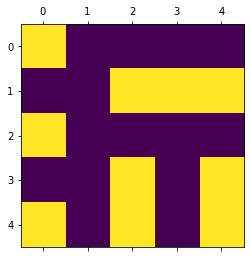

In [19]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=30,
                       fitness_func=fitness_func,
                       sol_per_pop=100,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       mutation_percent_genes=4)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 10")
print("Number of shots fired =", len(solution))
showResults(solution)

In [20]:
maxResult5x5_4 = 10
resultsList5x5_4 = []
timeList5x5_4 = []
bestResultsTimeList5x5_4 = []
perfectResultsTimeList5x5_4 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=30,
                        fitness_func=fitness_func,
                        sol_per_pop=100,
                        num_genes=target_board.size+1,
                        gene_type=int,
                        mutation_percent_genes=4)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList5x5_4.append(solution_fitness)
    timeList5x5_4.append(end - start)

for i in range(100):
    if resultsList5x5_4[i] == maxResult5x5_4:
        perfectResultsTimeList5x5_4.append(timeList5x5_4[i])
    if resultsList5x5_4[i]/maxResult5x5_4 >= 0.9:
        bestResultsTimeList5x5_4.append(timeList5x5_4[i])
        
interprateResults(maxResult5x5_4, resultsList5x5_4, bestResultsTimeList5x5_4, perfectResultsTimeList5x5_4)

Average hits of all solutions =  0.994
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  0.3123292398452759
Number of perfect solutions =  94
Average time of perfect solutions =  0.3124400833819775


As we can see, the algorithm copes well with the assigned task. So let's see if he will do as well with a standard 10x10 board.

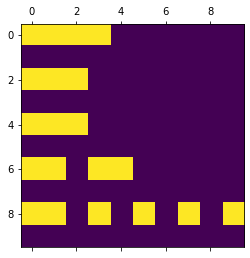

In [21]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

Here the chromosome will be 100 long.

We will increase the population to 300.

Let's set the interbreeding parents to 30% of the individuals.

However, we can reduce the mutation to the lowest possible value = 1.

Number of hits = 20 / 20
Number of shots fired = 100


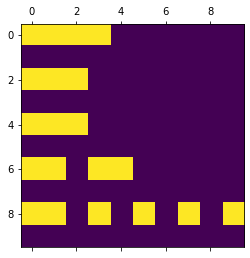

In [22]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=90,
                       fitness_func=fitness_func,
                       sol_per_pop=300,
                       num_genes=target_board.size,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Number of shots fired =", len(solution))
showResults(solution)

In [23]:
maxResult10x10_1 = 20
resultsList10x10_1 = []
timeList10x10_1 = []
bestResultsTimeList10x10_1 = []
perfectResultsTimeList10x10_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=100,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_1.append(solution_fitness)
    timeList10x10_1.append(end - start)

for i in range(100):
    if resultsList10x10_1[i] == maxResult10x10_1:
        perfectResultsTimeList10x10_1.append(timeList10x10_1[i])
    if resultsList10x10_1[i]/maxResult10x10_1 >= 0.9:
        bestResultsTimeList10x10_1.append(timeList10x10_1[i])

interprateResults(maxResult10x10_1, resultsList10x10_1, bestResultsTimeList10x10_1, perfectResultsTimeList10x10_1)

Average hits of all solutions =  1.0
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  2.0519690227508547
Number of perfect solutions =  100
Average time of perfect solutions =  2.0519690227508547


As we can see, the genetic algorithm also does great here. We obtained a 100% solution at the expense of slightly longer computational time.

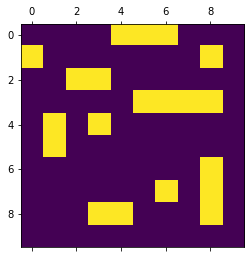

In [24]:
target_board =np.array([[0,0,0,0,1,1,1,0,0,0],
                        [1,0,0,0,0,0,0,0,1,0],
                        [0,0,1,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,1,0],
                        [0,1,0,1,0,0,0,0,0,0],
                        [0,1,0,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0,1,0],
                        [0,0,0,0,0,0,1,0,1,0],
                        [0,0,0,1,1,0,0,0,1,0],
                        [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

Number of hits = 20 / 20
Number of shots fired = 100


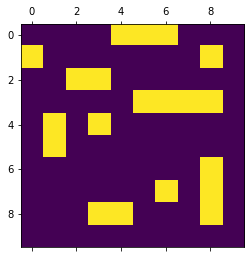

In [25]:
num_genes=target_board.size
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=90,
                    fitness_func=fitness_func,
                    sol_per_pop=300,
                    num_genes=target_board.size,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Number of shots fired =", len(solution))
showResults(solution)

In [26]:
maxResult10x10_2 = 20
resultsList10x10_2 = []
timeList10x10_2 = []
bestResultsTimeList10x10_2 = []
perfectResultsTimeList10x10_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_2.append(solution_fitness)
    timeList10x10_2.append(end - start)

for i in range(100):
    if resultsList10x10_2[i] == maxResult10x10_2:
        perfectResultsTimeList10x10_2.append(timeList10x10_2[i])
    if resultsList10x10_2[i]/maxResult10x10_2 >= 0.9:
        bestResultsTimeList10x10_2.append(timeList10x10_2[i])

interprateResults(maxResult10x10_2, resultsList10x10_2, bestResultsTimeList10x10_2, perfectResultsTimeList10x10_2)

Average hits of all solutions =  0.9995
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  1.1171635484695435
Number of perfect solutions =  99
Average time of perfect solutions =  1.1171976773425787


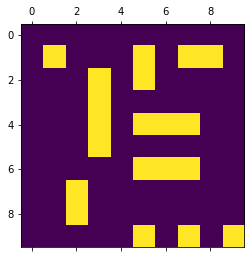

In [27]:
target_board =np.array([[0,0,0,0,0,0,0,0,0,0],
                        [0,1,0,0,0,1,0,1,1,0],
                        [0,0,0,1,0,1,0,0,0,0],
                        [0,0,0,1,0,0,0,0,0,0],
                        [0,0,0,1,0,1,1,1,0,0],
                        [0,0,0,1,0,0,0,0,0,0],
                        [0,0,0,0,0,1,1,1,0,0],
                        [0,0,1,0,0,0,0,0,0,0],
                        [0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,1,0,1,0,1]])
plt.matshow(target_board)
plt.show()

Number of hits = 20 / 20
Number of shots fired = 100


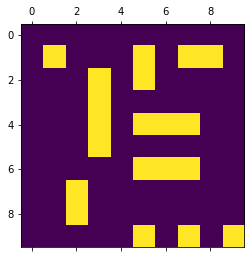

In [28]:
num_genes=target_board.size
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=90,
                    fitness_func=fitness_func,
                    sol_per_pop=300,
                    num_genes=target_board.size,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 20")
print("Number of shots fired =", len(solution))
showResults(solution)

In [29]:
maxResult10x10_3 = 20
resultsList10x10_3 = []
timeList10x10_3 = []
bestResultsTimeList10x10_3 = []
perfectResultsTimeList10x10_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                        num_parents_mating=90,
                        fitness_func=fitness_func,
                        sol_per_pop=300,
                        num_genes=target_board.size,
                        gene_type=int,
                        init_range_low=0,
                        init_range_high=target_board.shape[0],
                        mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList10x10_3.append(solution_fitness)
    timeList10x10_3.append(end - start)

for i in range(100):
    if resultsList10x10_3[i] == maxResult10x10_3:
        perfectResultsTimeList10x10_3.append(timeList10x10_3[i])
    if resultsList10x10_3[i]/maxResult10x10_3 >= 0.9:
        bestResultsTimeList10x10_3.append(timeList10x10_3[i])

interprateResults(maxResult10x10_3, resultsList10x10_3, bestResultsTimeList10x10_3, perfectResultsTimeList10x10_3)

Average hits of all solutions =  0.9984999999999999
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  1.0845398426055908
Number of perfect solutions =  97
Average time of perfect solutions =  1.085600344176145


In all three examples, the result was excellent.

Now let's set up a non-standard version of the ship game on a 15x15 board, where we will add a ship of size 6 and many smaller ones accordingly.

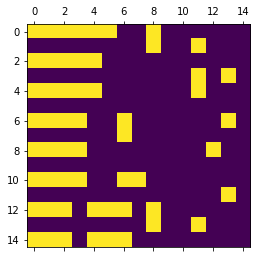

In [30]:
target_board = np.array([[1,1,1,1,1,1,0,0,1,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0],
                         [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
                         [1,1,1,1,1,0,0,0,0,0,0,1,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,1,0,0,0,0,0,0,1,0],
                         [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,0,0,0,0,0,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,0,1,1,0,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                         [1,1,1,0,1,1,1,0,1,0,0,0,0,0,0],
                         [0,0,0,0,0,0,0,0,1,0,0,1,0,0,0],
                         [1,1,1,0,1,1,1,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

At this point, we can try to reduce the number of generations due to the longer execution time of the algorithm. The problem becomes complicated, so if the results are unsatisfactory, we can always increase their number.

Let us assume a correspondingly larger population and parents.

Number of hits = 56 / 56
Number of shots fired = 226


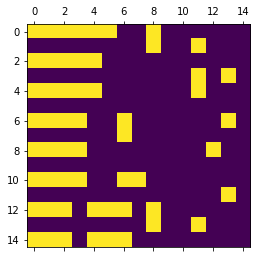

In [32]:
ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 56")
print("Number of shots fired =", len(solution))
showResults(solution)

In [33]:
maxResult15x15_1 = 56
resultsList15x15_1 = []
timeList15x15_1 = []
bestResultsTimeList15x15_1 = []
perfectResultsTimeList15x15_1 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_1.append(solution_fitness)
    timeList15x15_1.append(end - start)

for i in range(100):
    if resultsList15x15_1[i] == maxResult15x15_1:
        perfectResultsTimeList15x15_1.append(timeList15x15_1[i])
    if resultsList15x15_1[i]/maxResult15x15_1 >= 0.9:
        bestResultsTimeList15x15_1.append(timeList15x15_1[i])

interprateResults(maxResult15x15_1, resultsList15x15_1, bestResultsTimeList15x15_1, perfectResultsTimeList15x15_1)

Average hits of all solutions =  0.9992857142857143
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  3.7526686906814577
Number of perfect solutions =  96
Average time of perfect solutions =  3.7479730447133384


As we can see, we can obtain a perfect solution, but all of the 100 solutions were better than 90% effective.

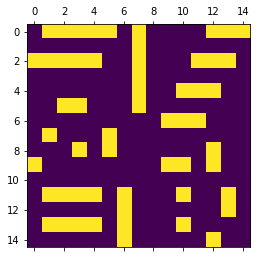

In [34]:
target_board =np.array([[0,1,1,1,1,1,0,1,0,0,0,0,1,1,1],
                        [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                        [1,1,1,1,1,0,0,1,0,0,0,1,1,1,0],
                        [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,1,0,0,1,1,1,0,0],
                        [0,0,1,1,0,0,0,1,0,0,0,0,0,0,0],
                        [0,0,0,0,0,0,0,0,0,1,1,1,0,0,0],
                        [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
                        [0,0,0,1,0,1,0,0,0,0,0,0,1,0,0],
                        [1,0,0,0,0,0,0,0,0,1,1,0,1,0,0],
                        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                        [0,1,1,1,1,0,1,0,0,0,1,0,0,1,0],
                        [0,0,0,0,0,0,1,0,0,0,0,0,0,1,0],
                        [0,1,1,1,1,0,1,0,0,0,1,0,0,0,0],
                        [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0]])
plt.matshow(target_board)
plt.show()

Number of hits = 56 / 56
Number of shots fired = 226


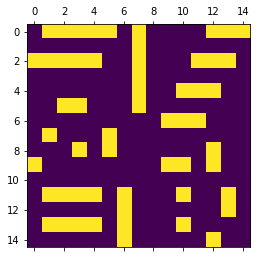

In [35]:
ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=180,
                    fitness_func=fitness_func,
                    sol_per_pop=600,
                    num_genes=target_board.size+1,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 56")
print("Number of shots fired =", len(solution))
showResults(solution)

In [36]:
maxResult15x15_2 = 56
resultsList15x15_2 = []
timeList15x15_2 = []
bestResultsTimeList15x15_2 = []
perfectResultsTimeList15x15_2 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                    num_parents_mating=180,
                    fitness_func=fitness_func,
                    sol_per_pop=600,
                    num_genes=target_board.size+1,
                    gene_type=int,
                    init_range_low=0,
                    init_range_high=target_board.shape[0],
                    mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_2.append(solution_fitness)
    timeList15x15_2.append(end - start)

for i in range(100):
    if resultsList15x15_2[i] == maxResult15x15_2:
        perfectResultsTimeList15x15_2.append(timeList15x15_2[i])
    if resultsList15x15_2[i]/maxResult15x15_2 >= 0.9:
        bestResultsTimeList15x15_2.append(timeList15x15_2[i])

interprateResults(maxResult15x15_2, resultsList15x15_2, bestResultsTimeList15x15_2, perfectResultsTimeList15x15_2)

Average hits of all solutions =  0.9896428571428572
Number of solutions better than or equal to 90% effectiveness =  100
Average time of solutions better than or equal to 90% effectiveness =  4.682340288162232
Number of perfect solutions =  62
Average time of perfect solutions =  4.6856451534455825


In this example, the number of perfect solutions is even lower, while 100% of the solutions achieve an efficiency not worse than 90%.

Taking advantage of the fact that we still have a lot of space on the board, let's see how the algorithm will cope when we add a ship of 7 lengths and, respectively, smaller ones.

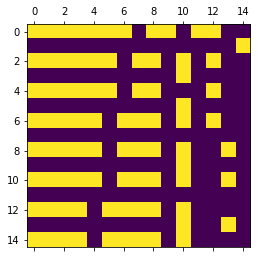

In [37]:
target_board = np.array([[1,1,1,1,1,1,1,0,1,1,0,1,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                         [1,1,1,1,1,1,0,1,1,0,1,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,1,0,1,1,0,0,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,1,0,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,0,1,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                         [1,1,1,1,1,0,1,1,1,0,1,0,0,1,0],
                         [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                         [1,1,1,1,0,1,1,1,1,0,1,0,0,0,0],
                         [0,0,0,0,0,0,0,0,0,0,1,0,0,1,0],
                         [1,1,1,1,0,1,1,1,1,0,1,0,0,0,0],])
plt.matshow(target_board)
plt.show()

Our board is already very full.

Number of hits = 83 / 84
Number of shots fired = 226


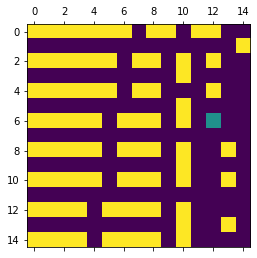

In [39]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
ga_instance.run()
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Number of hits = {solution_fitness}".format(solution_fitness=solution_fitness), "/ 84")
print("Number of shots fired =", len(solution))
showResults(solution)

In [40]:
maxResult15x15_3 = 84
resultsList15x15_3 = []
timeList15x15_3 = []
bestResultsTimeList15x15_3 = []
perfectResultsTimeList15x15_3 = []

for i in range(100):
    start = time.time()
    ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=250,
                       fitness_func=fitness_func,
                       sol_per_pop=500,
                       num_genes=target_board.size+1,
                       gene_type=int,
                       init_range_low=0,
                       init_range_high=target_board.shape[0],
                       mutation_percent_genes=1)
    ga_instance.run()
    end = time.time()
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    resultsList15x15_3.append(solution_fitness)
    timeList15x15_3.append(end - start)

for i in range(100):
    if resultsList15x15_3[i] == maxResult15x15_3:
        perfectResultsTimeList15x15_3.append(timeList15x15_3[i])
    if resultsList15x15_3[i]/maxResult15x15_3 >= 0.9:
        bestResultsTimeList15x15_3.append(timeList15x15_3[i])

interprateResults(maxResult15x15_3, resultsList15x15_3, bestResultsTimeList15x15_3, perfectResultsTimeList15x15_3)

Average hits of all solutions =  0.94
Number of solutions better than or equal to 90% effectiveness =  99
Average time of solutions better than or equal to 90% effectiveness =  3.775346861945258
Number of perfect solutions =  0


Unfortunately, the program did not cope with this task as well as with the previous ones. He failed to achieve any perfect result. Perhaps it is more difficult for him to find the pattern with such input data.

However, the tested cases had an average of 94% hits.

Now let's compare a genetic algorithm to an ant colony.

Let's determine the coordinates of the fields where the ships sail.

In [41]:
COORDS5x5_1 = (
    (0,0),(0,1),(0,2),(0,4),(2,0),
    (2,1),(2,3),(4,0),(4,1),(4,3)
)

In [42]:
%%capture test
start = time.time()

colony = AntColony(COORDS5x5_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime5x5_1 = end - start

In [43]:
hits = 0
for i in COORDS5x5_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Number of hits = ", hits, "/ 10")

Number of hits =  10 / 10


As we can see, for a 5x5 board the colony did very well.


In [45]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])

Let's check the same for size 10x10.

In [53]:
COORDS10x10_1 = (
    (0,0),(0,1),(0,2),(0,3),(2,0),(2,1),(2,2),(4,0),(4,1),(4,2),
    (6,0),(6,1),(6,3),(6,4),(8,0),(8,1),(8,3),(8,5),(8,7),(8,9)
)

In [54]:
%%capture test
start = time.time()
colony = AntColony(COORDS10x10_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime10x10_1 = end - start

In [55]:
hits = 0
for i in COORDS10x10_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Number of hits = ", hits, "/ 20")

Number of hits =  20 / 20


In this case, the result is also satisfactory.

Let's see 15x15 at the end.

In [56]:
COORDS15x15_1 = (
    (0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,8),(1,8),(0,11),(2,0),(2,1),(2,2),(2,3),(2,4),
    (3,13),(3,11),(4,0),(4,1),(4,2),(4,3),(4,4),(4,11),(6,0),(6,1),(6,2),(6,3),(6,6),(6,13),
    (7,6),(8,0),(8,1),(8,2),(8,3),(8,12),(10,0),(10,1),(10,2),(10,3),(10,7),(10,8),(11,13),(12,0),
    (12,1),(12,2),(12,4),(12,5),(12,6),(12,8),(13,8),(13,11),(14,0),(14,1),(14,2),(14,4),(14,5),(14,6),
)

In [61]:
%%capture test
start = time.time()
colony = AntColony(COORDS15x15_1, ant_count=100, alpha=0.5, beta=1.2, 
                    pheromone_evaporation_rate=0.40, pheromone_constant=1000.0,
                    iterations=100)

optimal_nodes = colony.get_path()
optimal_nodes = list(dict.fromkeys(optimal_nodes)) #remove duplicates
end = time.time()
colonyTime15x15_1 = end - start

In [62]:
hits = 0
for i in COORDS15x15_1:
    for j in optimal_nodes:
        if i == j:
            hits += 1
print("Number of hits = ", hits, "/ 56")

Number of hits =  56 / 56


Finally, let's compare the time needed for calculations for individual cases.

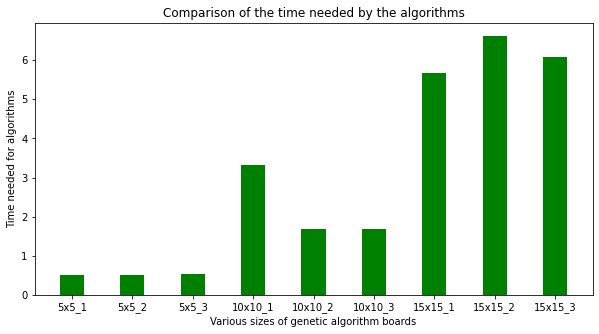

In [64]:
data = {'5x5_1': 0.5070, '5x5_2': 0.5131, '5x5_3': 0.5287,
        '10x10_1': 3.3107, '10x10_2': 1.6774, '10x10_3': 1.6736,
        '15x15_1': 5.6761, '15x15_2': 6.6170, '15x15_3': 6.0706,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("Various sizes of genetic algorithm boards")
plt.ylabel("Time needed for algorithms")
plt.title("Comparison of the time needed by the algorithms")
plt.show()

Intuitively, the larger the board, the more time the algorithm needs.

But why did it take the algorithm almost twice as long to solve the first 10x10 board? Let's take a look at this arrangement again.

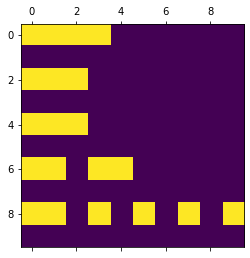

In [65]:
target_board = np.array([[1,1,1,1,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,1,0,0,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,1,0,0,0,0,0],
                            [0,0,0,0,0,0,0,0,0,0],
                            [1,1,0,1,0,1,0,1,0,1],
                            [0,0,0,0,0,0,0,0,0,0]])
plt.matshow(target_board)
plt.show()

It is quite non-standard, which may affect the time needed to find the best solution.

Let's compare genetic algorithms to an ant colony.

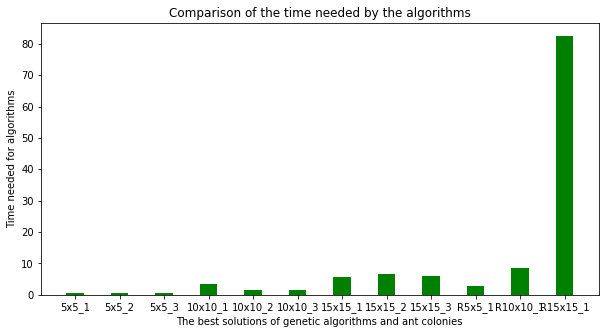

In [67]:
data = {'5x5_1': 0.5070, '5x5_2': 0.5131, '5x5_3': 0.5287,
        '10x10_1': 3.3107, '10x10_2': 1.6774, '10x10_3': 1.6736,
        '15x15_1': 5.6761, '15x15_2': 6.6170, '15x15_3': 6.0706,
        'R5x5_1': colonyTime5x5_1, 'R10x10_1': colonyTime10x10_1, 'R15x15_1': colonyTime15x15_1,
        }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("The best solutions of genetic algorithms and ant colonies")
plt.ylabel("Time needed for algorithms")
plt.title("Comparison of the time needed by the algorithms")
plt.show()

As we can see, the gap is huge, and although the colonies did quite well, they are clearly not made for the ship game.
